In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('C:/Users/ayush/Downloads/DockerProject/ML/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/ayush/Downloads/DockerProject/ML/input\nutrients.json


In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import os
import os.path

In [3]:
"""
Enter A Valid filePath to the Location of the Extracted JSON File.
"""

filePath = 'C:/Users/ayush/Downloads/DockerProject/ML/input/nutrients.json'


def importJsonToDataframe(filePath):
    """Function to import JSON file.
    Args:
        param1: path to JSON file
    Returns:
        A dataframe of Nutrient Database.
        Prints an Error Message if file cannot be found
        or path doesnt exist.
        The DataFrame contains FoodNames, Group_Id, Manufacturer_ids etc
    """
    if os.path.isfile(filePath) and os.access(filePath, os.R_OK):
        df = pd.read_json(filePath, lines=True)
        return df
    else:
        print("Either file is missing or is not readable")
        print("")
        print("Please Enter A Valid filePath & Re-Run the Program")


In [4]:
def generateNutrientList(df):
    """Function to Generate Nutrient List.
    Args:
        param1: DataFrame
    Returns:
        A list of Nutrients per row in Nutrient Database.
    """
    nutrients = df['nutrients']
    nutNamesList = []
    for x in range(len(nutrients)):
        a = nutrients.iloc[x]
        tempList = []
        for y in range(len(a)):
            b = a[y][u'name']
            tempList.append(b)
        nutNamesList.append(tempList)
    return nutNamesList


def generateFoodList(df):
    """Function to Generate List of Food Items .
    Args:
        param1: DataFrame
    Returns:
        A list of Food Items in Nutrient Database.
    """
    names = df['name']
    foodList = []
    for x in range(len(names)):
        a = names.iloc[x]
        for y in range(len(a)):
            b = a[u'long']
        foodList.append(b)
    return foodList


In [5]:
"""
Call the importJsonToDataframe function passing the
filepath as parameter to import the JSON file and create
a dataframe
"""
df = importJsonToDataframe(filePath)

"""
Create a NutrientList using the generateNutrientList function
and passing the df as input parameter
"""

nutrientsList = generateNutrientList(df)

"""
Create a foodList using the generateNutrientList function
and passing the df as input parameter
"""

foodList = generateFoodList(df)


# Zinc Zn

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Median Zinc Content by Food Group
----------------------------------

                            groupSeries  zincMedianByRow
3                         Beef Products            5.190
12        Lamb, Veal, and Game Products            3.565
15                Nut and Seed Products            3.310
22                     Spices and Herbs            2.840
5                     Breakfast Cereals            2.700
16                        Pork Products            2.290
19          Sausages and Luncheon Meats            2.110
17                     Poultry Products            2.040
20                               Snacks            1.420
8                            Fast Foods            1.240
6               Cereal Grains and Pasta            1.090
0   American Indian/Alaska Native Foods            1.045
13          Legumes and Legume Products            1.000
7                Dairy and Egg Products            0.830
14      Meals, Entrees, and Side Dishes            0.750
18               

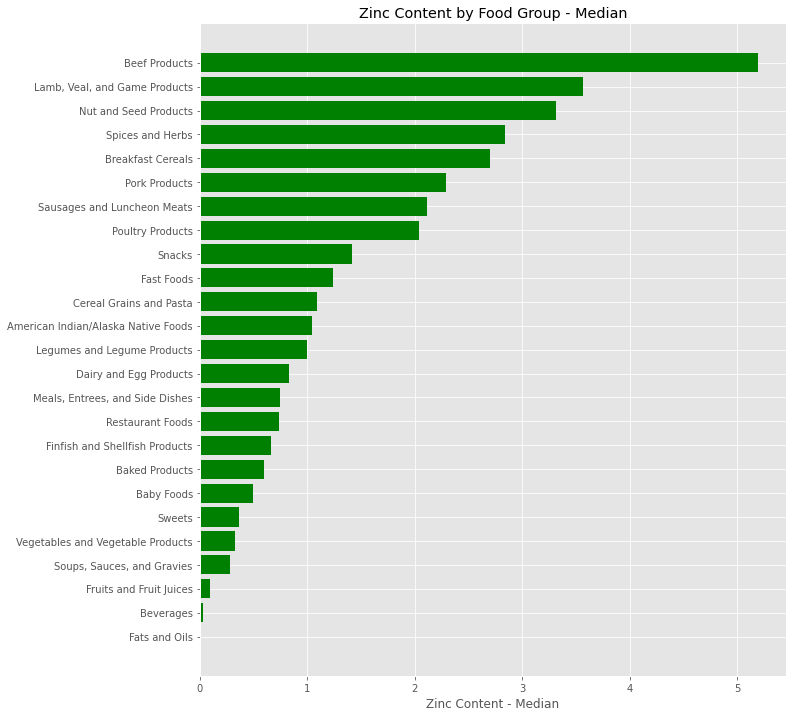

In [6]:
def generateAverageZincValueByRow(df):
    """Function to Generate A DataFrame that Contains
    of Food Items and their Associated Median Zinc Value.
    Args:
        param1: DataFrame
    Returns:
        A DataFrame of Zinc Value by Food Items.
    """
    nutrients = df['nutrients']
    outPut = []
    for x in range(len(nutrients)):
        subSet = nutrients[x]
        temp = []
        for subSet_2 in range(len(subSet)):
            if str(subSet[subSet_2][u'name']) in "Zinc, Zn":
                temp.append(subSet[subSet_2][u'value'])
        outPut.append(np.median(temp))
    return pd.Series(outPut)

def barPlot(zincGrouped):
    """Function to Generate A Chart of Unique Food Items and
    Associated Median Zinc Content..
    Args:
        param1: DataFrame
    Returns:
        An Horizontal Bar chart.
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 12)
    zincName = zincGrouped['groupSeries']
    y_pos = range(len(zincGrouped['groupSeries']))
    median = zincGrouped['zincMedianByRow']
    ax.barh(y_pos, median, align='center', color='g', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(zincName)
    ax.invert_yaxis()
    ax.set_xlabel('Zinc Content - Median')
    ax.set_title('Zinc Content by Food Group - Median')
    plt.show()


"""
The following calls generates the Median Zinc Content by Food Group
Displays and plot the result to Console
"""

zincMedianByRow = generateAverageZincValueByRow(df)

groupSeries = df['group']

zincFullTable = pd.concat([groupSeries, zincMedianByRow], axis=1)

zincFullTable.columns = ['groupSeries', 'zincMedianByRow']

zincGrouped = zincFullTable.groupby(
    ['groupSeries'], as_index=False).median()

print("")

print("Median Zinc Content by Food Group")

print("----------------------------------")

print("")


zincGrouped.sort_values(
    by='zincMedianByRow',
    ascending=False,
    inplace=True)

print(zincGrouped)
barPlot(zincGrouped)

# Sodium Na

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Median Sodium Content by Food Group
----------------------------------

                            groupSeries  sodiumMedianByRow
19          Sausages and Luncheon Meats              976.5
8                            Fast Foods              560.0
2                        Baked Products              434.0
18                     Restaurant Foods              430.0
21           Soups, Sauces, and Gravies              387.0
5                     Breakfast Cereals              385.0
14      Meals, Entrees, and Side Dishes              379.0
20                               Snacks              326.0
13          Legumes and Legume Products              218.0
7                Dairy and Egg Products              141.0
10       Finfish and Shellfish Products               90.0
17                     Poultry Products               90.0
16                        Pork Products               87.0
23                               Sweets               79.0
12        Lamb, Veal, and Game Products   

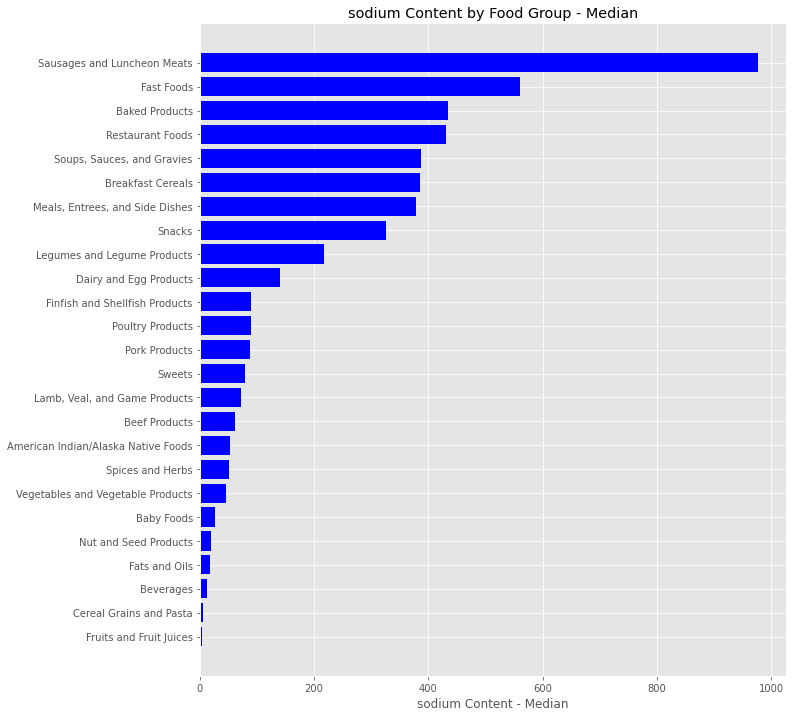

In [7]:
def generateAverageSodiumValueByRow(df):
   
    nutrients = df['nutrients']
    outPut = []
    for x in range(len(nutrients)):
        subSet = nutrients[x]
        temp = []
        for subSet_2 in range(len(subSet)):
            if str(subSet[subSet_2][u'name']) in "Sodium, Na":
                temp.append(subSet[subSet_2][u'value'])
        outPut.append(np.median(temp))
    return pd.Series(outPut)


def barPlot(sodiumGrouped):
    """Function to Generate A Chart of Unique Food Items and
    Associated Median Sodium Content..
    Args:
        param1: DataFrame
    Returns:
        An Horizontal Bar chart.
    """
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 12)
    sodiumName = sodiumGrouped['groupSeries']
    y_pos = range(len(sodiumGrouped['groupSeries']))
    median = sodiumGrouped['sodiumMedianByRow']
    ax.barh(y_pos, median, align='center', color='blue', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sodiumName)
    ax.invert_yaxis()
    ax.set_xlabel('sodium Content - Median')
    ax.set_title('sodium Content by Food Group - Median')
    plt.show()


"""
The following calls generates the Median sodium Content by Food Group
Displays and plot the result to Console
"""
sodiumMedianByRow = generateAverageSodiumValueByRow(df)

groupSeries = df['group']

sodiumFullTable = pd.concat([groupSeries, sodiumMedianByRow], axis=1)

sodiumFullTable.columns = ['groupSeries', 'sodiumMedianByRow']

sodiumGrouped = sodiumFullTable.groupby(
    ['groupSeries'], as_index=False).median()

print("")

print("Median Sodium Content by Food Group")

print("----------------------------------")

print("")


sodiumGrouped.sort_values(
    by='sodiumMedianByRow',
    ascending=False,
    inplace=True)

print(sodiumGrouped)

barPlot(sodiumGrouped)



# Calcium, Ca


Median calcium Content by Food Group
----------------------------------

                            groupSeries  calciumMedianByRow
22                     Spices and Herbs               383.0
7                Dairy and Egg Products               143.0
8                            Fast Foods                96.0
15                Nut and Seed Products                70.0
2                        Baked Products                68.0
20                               Snacks                57.0
13          Legumes and Legume Products                57.0
23                               Sweets                54.5
5                     Breakfast Cereals                52.0
14      Meals, Entrees, and Side Dishes                49.0
1                            Baby Foods                36.0
18                     Restaurant Foods                34.0
10       Finfish and Shellfish Products                29.0
24    Vegetables and Vegetable Products                27.0
6               Cereal Gra

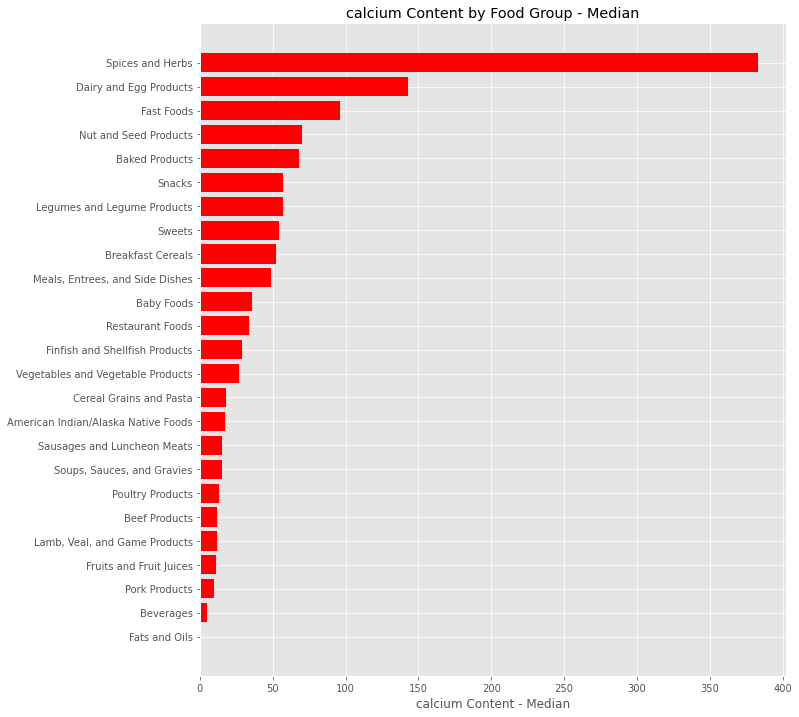

In [15]:
def generateAverageCalciumValueByRow(df):
 
    nutrients = df['nutrients']
    outPut = []
    for x in range(len(nutrients)):
        subSet = nutrients[x]
        temp = []
        for subSet_2 in range(len(subSet)):
            if str(subSet[subSet_2][u'name']) in "Calcium, Ca":
                temp.append(subSet[subSet_2][u'value'])
        outPut.append(np.median(temp))
    return pd.Series(outPut)


def barPlot(sodiumGrouped):
 
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 12)
    calciumName = calciumGrouped['groupSeries']
    y_pos = range(len(calciumGrouped['groupSeries']))
    median = calciumGrouped['calciumMedianByRow']
    ax.barh(y_pos, median, align='center', color='red', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(calciumName)
    ax.invert_yaxis()
    ax.set_xlabel('calcium Content - Median')
    ax.set_title('calcium Content by Food Group - Median')
    plt.show()


"""
The following calls generates the Median calcium Content by Food Group
Displays and plot the result to Console
"""
calciumMedianByRow = generateAverageCalciumValueByRow(df)

groupSeries = df['group']

calciumFullTable = pd.concat([groupSeries, calciumMedianByRow], axis=1)

calciumFullTable.columns = ['groupSeries', 'calciumMedianByRow']

calciumGrouped = calciumFullTable.groupby(
    ['groupSeries'], as_index=False).median()

print("")

print("Median calcium Content by Food Group")

print("----------------------------------")

print("")


calciumGrouped.sort_values(
    by='calciumMedianByRow',
    ascending=False,
    inplace=True)

print(calciumGrouped)

barPlot(calciumGrouped)



# Lysine

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Median Lysine Content by Food Group
----------------------------------

                            groupSeries  lysineMedianByRow
3                         Beef Products             2.2450
16                        Pork Products             1.9645
12        Lamb, Veal, and Game Products             1.9615
17                     Poultry Products             1.9275
10       Finfish and Shellfish Products             1.8175
0   American Indian/Alaska Native Foods             1.8100
19          Sausages and Luncheon Meats             1.1600
7                Dairy and Egg Products             0.7930
8                            Fast Foods             0.7475
18                     Restaurant Foods             0.6445
13          Legumes and Legume Products             0.6160
15                Nut and Seed Products             0.5450
14      Meals, Entrees, and Side Dishes             0.4100
22                     Spices and Herbs             0.3750
20                               Snacks   

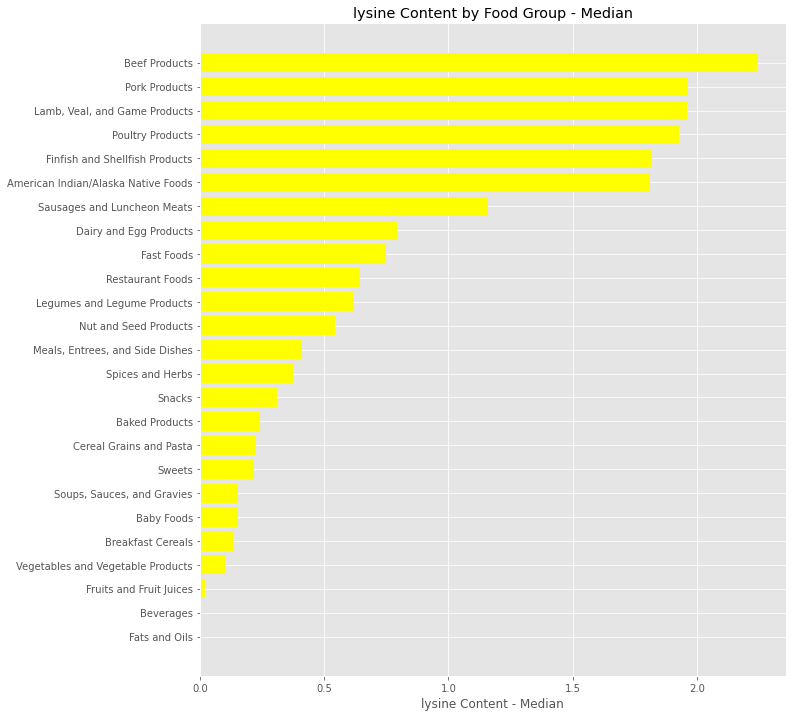

In [16]:
def generateAverageLysineValueByRow(df):
   
    nutrients = df['nutrients']
    outPut = []
    for x in range(len(nutrients)):
        subSet = nutrients[x]
        temp = []
        for subSet_2 in range(len(subSet)):
            if str(subSet[subSet_2][u'name']) in "Lysine":
                temp.append(subSet[subSet_2][u'value'])
        outPut.append(np.median(temp))
    return pd.Series(outPut)


def barPlot(lysineGrouped):
   
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 12)
    lysineName = lysineGrouped['groupSeries']
    y_pos = range(len(lysineGrouped['groupSeries']))
    median = lysineGrouped['lysineMedianByRow']
    ax.barh(y_pos, median, align='center', color='yellow', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(lysineName)
    ax.invert_yaxis()
    ax.set_xlabel('lysine Content - Median')
    ax.set_title('lysine Content by Food Group - Median')
    plt.show()


"""
The following calls generates the Median lysine Content by Food Group
Displays and plot the result to Console
"""
lysineMedianByRow = generateAverageLysineValueByRow(df)

groupSeries = df['group']

lysineFullTable = pd.concat([groupSeries, lysineMedianByRow], axis=1)

lysineFullTable.columns = ['groupSeries', 'lysineMedianByRow']

lysineGrouped = lysineFullTable.groupby(
    ['groupSeries'], as_index=False).median()

print("")

print("Median Lysine Content by Food Group")

print("----------------------------------")

print("")


lysineGrouped.sort_values(
    by='lysineMedianByRow',
    ascending=False,
    inplace=True)

print(lysineGrouped)

barPlot(lysineGrouped)

